In [1]:
#Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#Loading Dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"


names = ['id-number','clump-thickness','uniformity-of-cell-size','uniformity-of-cell-shape','marginal-adhesion',
        'single-epithetical-cell-size','bare-nuclei','bland-chromatin','normal-nucleoli','mitoses','class']

missing_values = ["n/a", "na", "--","?"]
dataset = pd.read_csv(url, names=names, na_values = missing_values)

#Dropping the id-number column 
dataset.drop('id-number', axis=1, inplace=True) 
dataset.head()

,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal-adhesion,single-epithetical-cell-size,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [3]:
dataset.interpolate(method='polynomial', order=5)

#Filling out the missing values
dataset.fillna(0,inplace=True)
dataset.astype('int64')

,clump-thickness,uniformity-of-cell-size,uniformity-of-cell-shape,marginal-adhesion,single-epithetical-cell-size,bare-nuclei,bland-chromatin,normal-nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2,1,1,1,2
695,2,1,1,1,2,1,1,1,1,2
696,5,10,10,3,7,3,8,10,2,4
697,4,8,6,4,3,4,10,6,1,4


In [4]:
#Preprocessing
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 9].values

#Split testing and training data in 70 to 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [5]:
#Converting array object to dataframe
X_train_df = pd.DataFrame(X_train)
y_train_df = pd.DataFrame(y_train)
X_test_df = pd.DataFrame(X_test)
y_test_df = pd.DataFrame(y_test)


In [6]:
#Feature Scaling and Standardization

scaler = StandardScaler()
scaler.fit(X_train_df)

X_train_df = scaler.transform(X_train_df)
X_test_df = scaler.transform(X_test_df)

X_train_df = pd.DataFrame(X_train_df)
X_test_df = pd.DataFrame(X_test_df)


In [17]:
#Basic Model 
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
y_pred

array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4,
       4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4,
       4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2], dtype=int64)

In [8]:
#Results
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[141   1]
 [  2  66]]
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       142
           4       0.99      0.97      0.98        68

    accuracy                           0.99       210
   macro avg       0.99      0.98      0.98       210
weighted avg       0.99      0.99      0.99       210



In [9]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))



Text(0, 0.5, 'Mean Error')

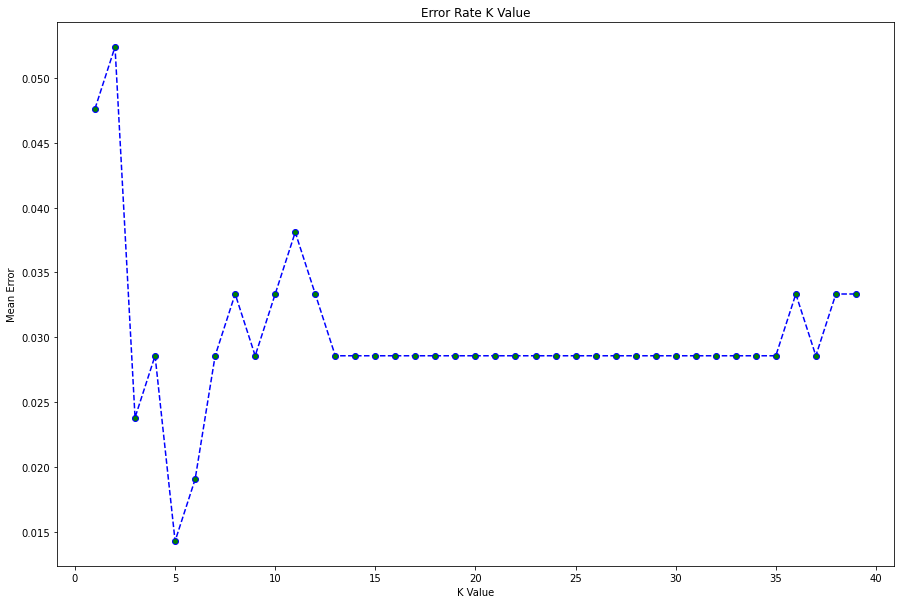

In [10]:
plt.figure(figsize=(15, 10))
plt.plot(range(1, 40), error, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='green', markersize=6)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [20]:
#Best Possible Model 
i = np.argmin(error)
classifier = KNeighborsClassifier(n_neighbors=i+1)
classifier.fit(X_train, y_train)

y_pred_best = classifier.predict(X_test)
y_pred_best


array([2, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 4, 2, 2, 2, 2, 2, 2, 4, 4, 2,
       4, 2, 2, 2, 2, 2, 2, 4, 4, 4, 4, 4, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2, 4,
       4, 2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 4, 2, 4, 4, 2, 4,
       2, 4, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 2, 2, 2, 2, 2, 2, 4, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 4, 4, 2, 2, 4, 4, 2, 4, 2, 4, 2, 2, 2, 2, 4, 4,
       4, 2, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 2, 2, 2, 4, 2, 4, 2, 2, 2, 2,
       2, 2, 4, 4, 2, 2, 2, 2, 4, 2, 4, 4, 2, 2, 4, 2, 2, 4, 4, 2, 2, 2,
       2, 2, 2, 4, 2, 2, 4, 4, 2, 4, 2, 2, 2, 2, 4, 2, 2, 2, 4, 2, 2, 2,
       4, 4, 2, 2, 2, 4, 4, 2, 2, 4, 2, 2], dtype=int64)

In [21]:
#Results for Best Possible Model
print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))

[[141   1]
 [  2  66]]
              precision    recall  f1-score   support

           2       0.99      0.99      0.99       142
           4       0.99      0.97      0.98        68

    accuracy                           0.99       210
   macro avg       0.99      0.98      0.98       210
weighted avg       0.99      0.99      0.99       210

